 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb & xh1163'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [3]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


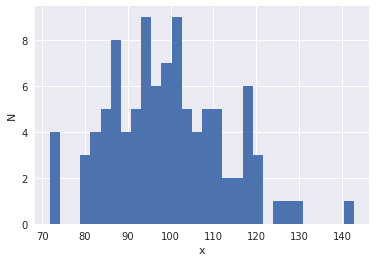

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.25, standard deviation: 13.39


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
 #mysize = (np.random.rand(100) * 1000).astype(int)
#print (mysize, mysize.shape)

np.random.seed(199)
mymean =100
ns = 100
mysize =[]


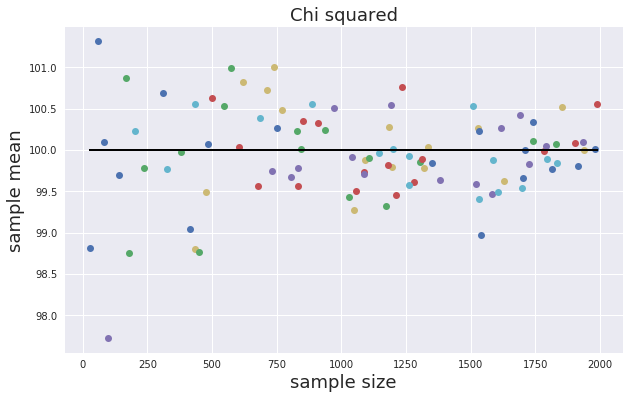

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq']={}
for i in range(ns):
    s = int(np.random.rand()*1990 + 10)
    sample = np.random.chisquare(df= mymean, size=s)
    mysize.append(s)
    md['chisq'][s]=sample


#md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

#for n in mysize:
 #   md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: 
The figure above shows the plot of sample mean against the sample size in a Chi-squared distribution of 100 samples with different sizes. We can see from the figure as the sample size increases,  the sample means are merging towardthe set mean value 100, which is consistent to the law of large numbers that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

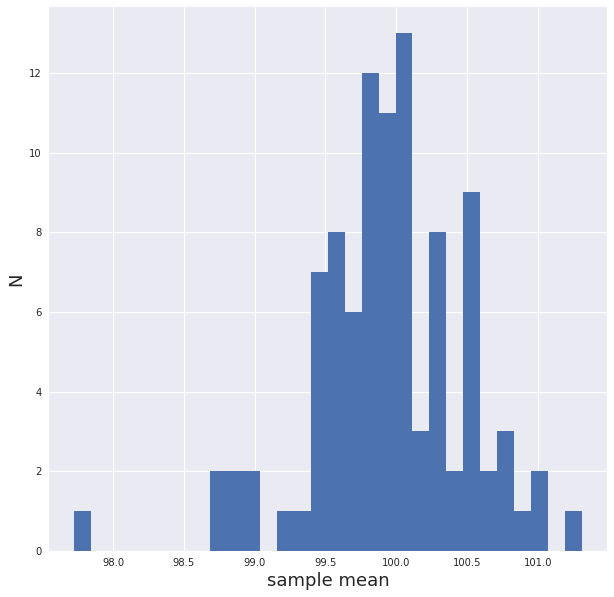

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: 
The distributions of all sample means in the figure is a normal/gaussian distribution, with a symmetric bell shape, , a range from 98 to 101.5.and a peak value 13 at mean 100. The gaussion distubution  of the means of 100 samples with randome sizes verified the Central limit theorem which even when independent random variables are added, their properly normalized sum still tends toward a normal distribution. 


# Do it for the Normal distribution


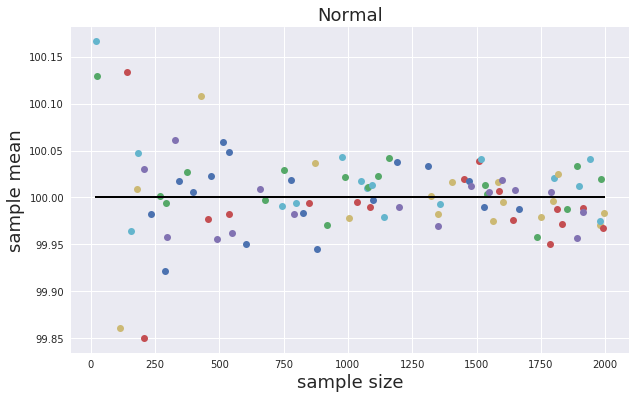

In [10]:
np.random.seed(299)
mymean =100
ns = 100
mysize2 =[]
md['normal']={}
for i in range(ns):
    s = int(np.random.rand()*1990 + 10)
    sample = np.random.normal(loc= mymean, size=s)
    mysize2.append(s)
    md['normal'][s]=sample

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize2), max(mysize2)], [df, df], 'k')

### Figure 4: 
The figure above shows the plot of sample mean against the sample size in a Normal distribution of 100 samples with different sizes. We can see from the figure as the sample size increases, the sample means tend to merge towarding the expected mean value 100, which is consistent to the law of large numbers that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

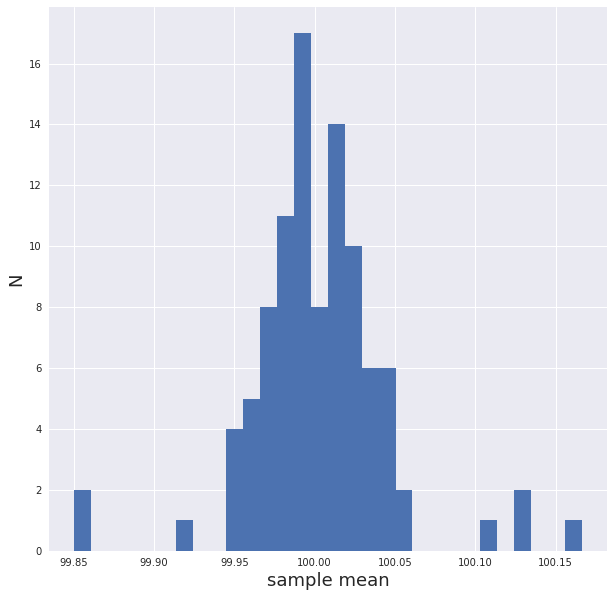

In [11]:
allmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 5:¶
The distributions of all sample means in the figure is a normal/gaussian distribution, with a symmetric bell shape, a peak value 17 at mean 100, and a range from 99.85 to 100.20. The gaussion distubution of the means of 100 samples with randome sizes verified the Central limit theorem which even when independent random variables are added, their properly normalized sum still tends toward a normal distribution.

# Do it for the Poisson distribution

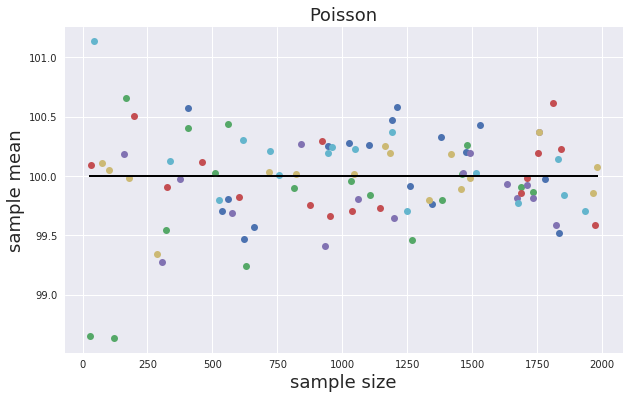

In [12]:
np.random.seed(399)
mymean =100
mysize3 =[]
md['pois']={}
for i in range(100):
    s = int(np.random.rand()*1990 + 10)
    sample = numpy.random.poisson(lam= mymean, size=s)
    mysize3.append(s)
    md['pois'][s]=sample

md['pois']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Poisson', fontsize=18)
        axnormal_mu_n.plot([min(mysize3), max(mysize3)], [df, df], 'k')



### Figure 6: 
The figure above shows the plot of sample mean against the sample size in a Possion distribution of 100 samples with different sizes. We can see from the figure as the sample size increases, the range of sample means tends to be smaller and closer to the expected mean value 100, which is consistent to the law of large numbers that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

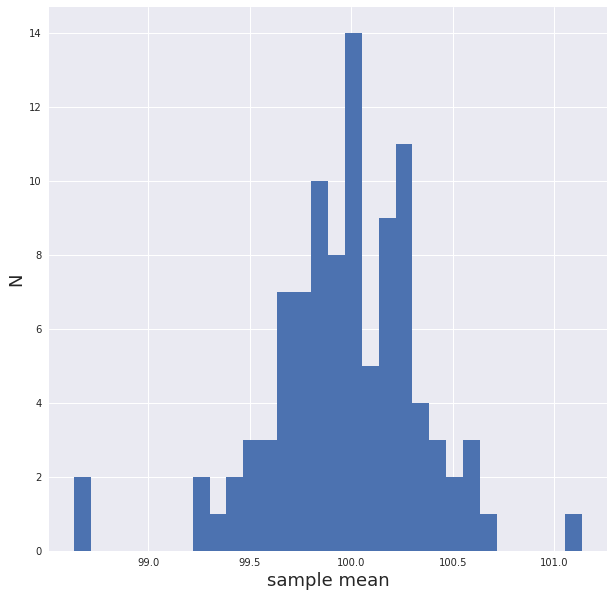

In [13]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 7:¶
The distributions of all sample means in the figure is a normal/gaussian distribution, with a symmetric bell shape, a peak value 14 at mean 100, and a range from 98.85 to 101.15. The gaussion distubution of the means of 100 samples with randome sizes verified the Central limit theorem which even when independent random variables are added, their properly normalized sum still tends toward a normal distribution.

# Do it for the Binomial distribution

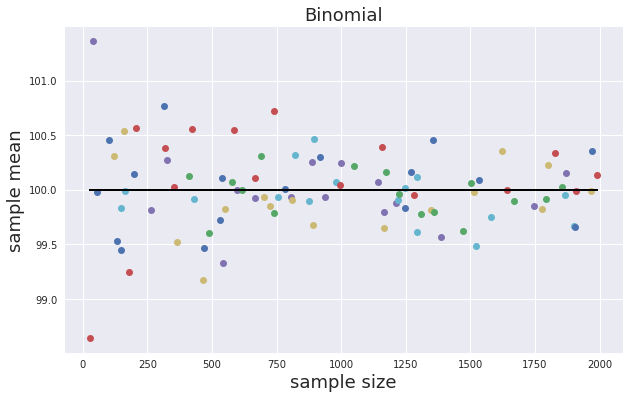

In [14]:
np.random.seed(499)
mysize4 =[]
md['bino']={}
for i in range(100):
    s = int(np.random.rand()*1990 + 10)
    sample = numpy.random.binomial(n=500,p=0.2, size=s)
    mysize4.append(s)
    md['bino'][s]=sample

md['bino']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bino']:
    if not type(nn) == str:
        md['bino']['means'][nn] = md['bino'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['bino']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Binomial', fontsize=18)
        axnormal_mu_n.plot([min(mysize4), max(mysize4)], [df, df], 'k')



### Figure 8: 
The figure above shows the plot of sample mean against the sample size in a Binomial distribution of 100 samples with different sizes. We can see from the figure as the sample size increases, the range of sample means tends to be smaller and closer to the expected mean value 100, which is consistent to the law of large numbers that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

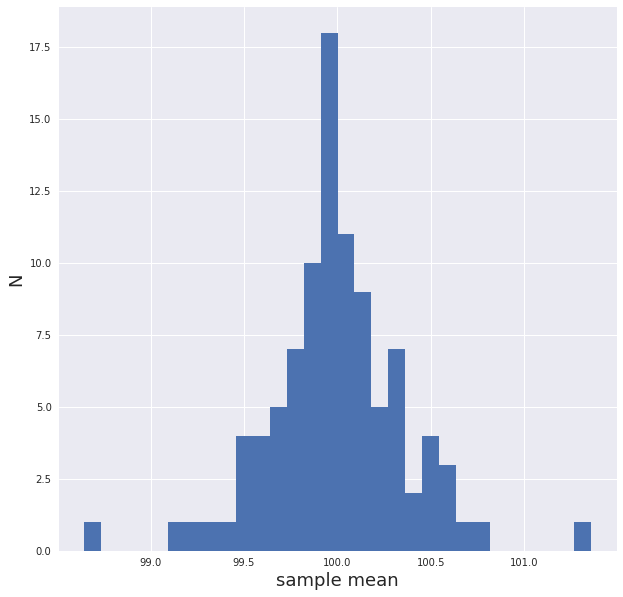

In [15]:
allmeans = list(md['bino']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 9:¶
The distributions of all sample means in the figure is a normal/gaussian distribution, with a symmetric bell shape, a peak value 18 at mean 100, and a range from 98.25 to 101.85. The gaussion distubution of the means of 100 samples with randome sizes verified the Central limit theorem which even when independent random variables are added, their properly normalized sum still tends toward a normal distribution.

# Do it for another distribution(Uniform)

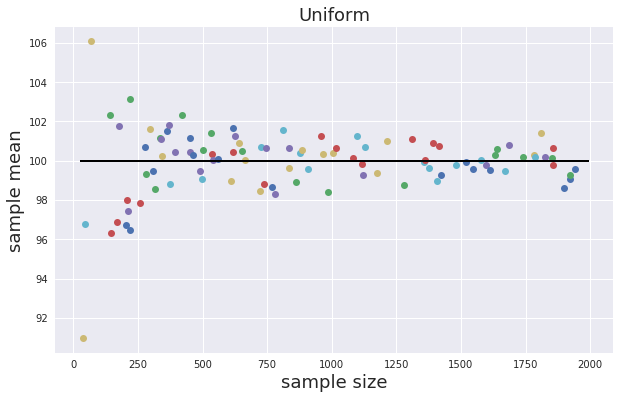

In [16]:
np.random.seed(599)
mysize5 =[]
md['unif']={}
for i in range(100):
    s = int(np.random.rand()*1990 + 10)
    sample = numpy.random.uniform(low=50,high=150, size=s)
    mysize5.append(s)
    md['unif'][s]=sample

md['unif']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['unif']:
    if not type(nn) == str:
        md['unif']['means'][nn] = md['unif'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['unif']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Uniform', fontsize=18)
        axnormal_mu_n.plot([min(mysize4), max(mysize4)], [df, df], 'k')



### Figure 10: 
The figure above shows the plot of sample mean against the sample size in a Binomial distribution of 100 samples with different sizes. We can see from the figure as the sample size increases, the sample means tend to merge towards the expected mean value 100, which is consistent to the law of large numbers that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

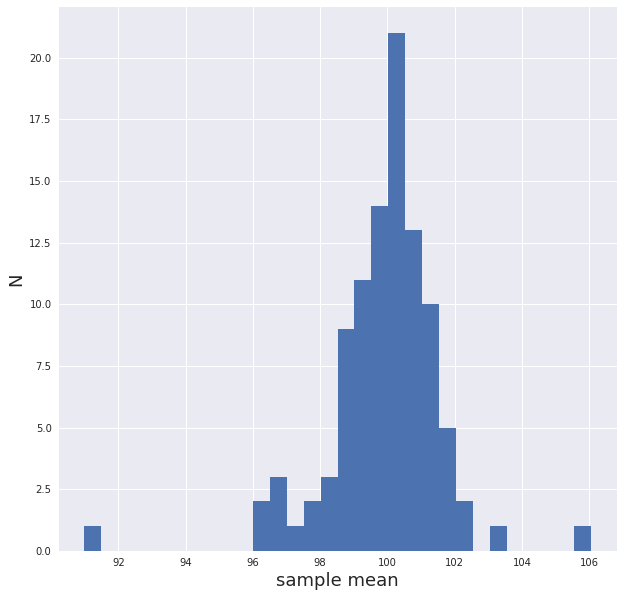

In [17]:
allmeans = list(md['unif']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 11:¶
The distributions of all sample means in the figure is a normal/gaussian distribution, with a symmetric bell shape, a peak value 21 at mean 100, and a range from 91 to 106. The gaussion distubution of the means of 100 samples with randome sizes verified the Central limit theorem which even when independent random variables are added, their properly normalized sum still tends toward a normal distribution.